In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('historical_automobile_sales.csv')
df

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,8/31/2023,2023,Aug,0,103.36,0.25,27852.993,1793,6,57.169,0.764155,2.6,1579.6,Executivecar,New York
524,9/30/2023,2023,Sep,0,101.55,0.07,21183.704,1028,5,59.315,0.036180,2.5,1123.4,Smallfamiliycar,California
525,10/31/2023,2023,Oct,0,124.66,0.12,15975.589,1148,9,19.472,-2.046169,2.5,1685.9,Sports,California
526,11/30/2023,2023,Nov,0,97.09,0.25,16862.288,4850,5,27.904,0.302179,2.9,2124.6,Smallfamiliycar,Georgia


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     528 non-null    object 
 1   Year                     528 non-null    int64  
 2   Month                    528 non-null    object 
 3   Recession                528 non-null    int64  
 4   Consumer_Confidence      528 non-null    float64
 5   Seasonality_Weight       528 non-null    float64
 6   Price                    528 non-null    float64
 7   Advertising_Expenditure  528 non-null    int64  
 8   Competition              528 non-null    int64  
 9   GDP                      528 non-null    float64
 10  Growth_Rate              528 non-null    float64
 11  unemployment_rate        528 non-null    float64
 12  Automobile_Sales         528 non-null    float64
 13  Vehicle_Type             528 non-null    object 
 14  City                     5

In [4]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [5]:
total_missing = df.isnull().sum()
total_missing

num_duplicates = df.duplicated().sum()
num_duplicates

0

In [6]:
import matplotlib.pyplot as plt

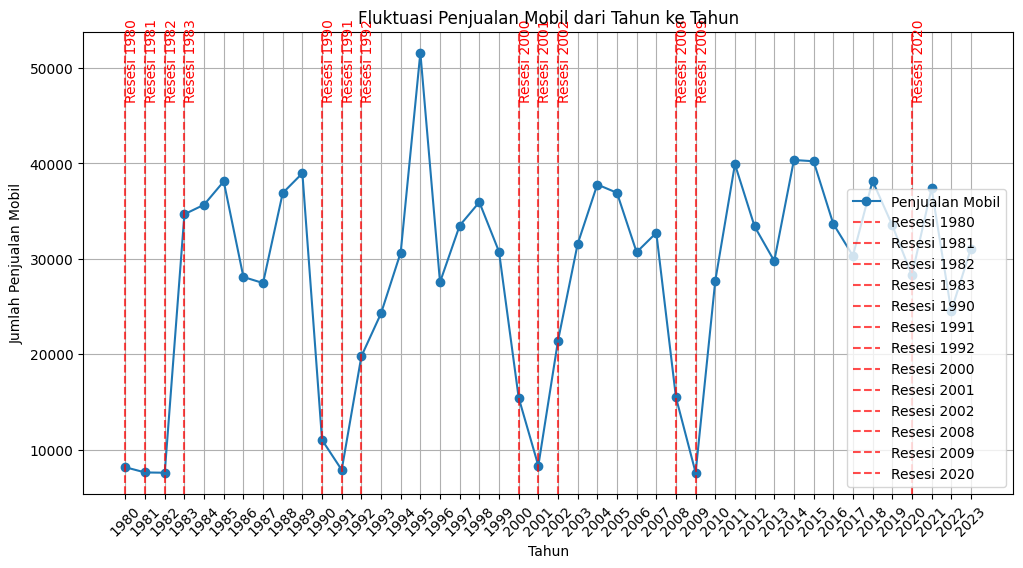

In [12]:
df_grouped = df.groupby('Year')['Automobile_Sales'].sum()
plt.figure(figsize=(12,6))
plt.plot(df_grouped.index, df_grouped.values, marker='o', linestyle='-', label='Penjualan Mobil')
plt.xlabel("Tahun")
plt.ylabel("Jumlah Penjualan Mobil")
plt.title("Fluktuasi Penjualan Mobil dari Tahun ke Tahun")
plt.xticks(df_grouped.index, rotation=45)
plt.grid(True)

low_sales_recession = df[(df['Recession'] == 1) & (df['Automobile_Sales'] < 10000)]['Year'].unique()
for year in low_sales_recession:
    if year in df_grouped.index:
        plt.axvline(x=year, color='r', linestyle='--', alpha=0.7, label=f'Resesi {year}')
        plt.text(year, df_grouped.max()*0.9, f'Resesi {year}', color='red', fontsize=10, rotation=90, verticalalignment='bottom')

plt.legend()
plt.show()

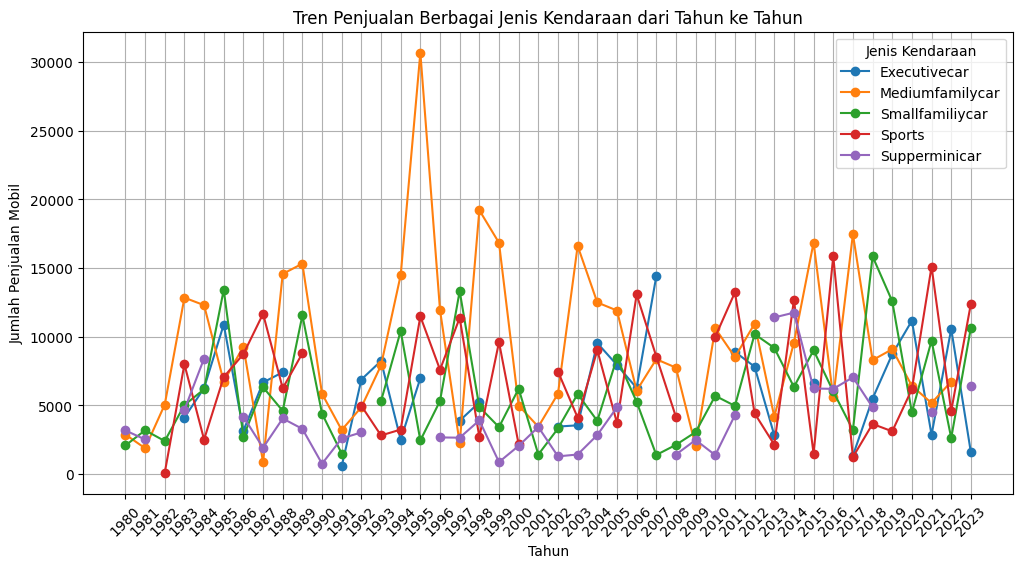

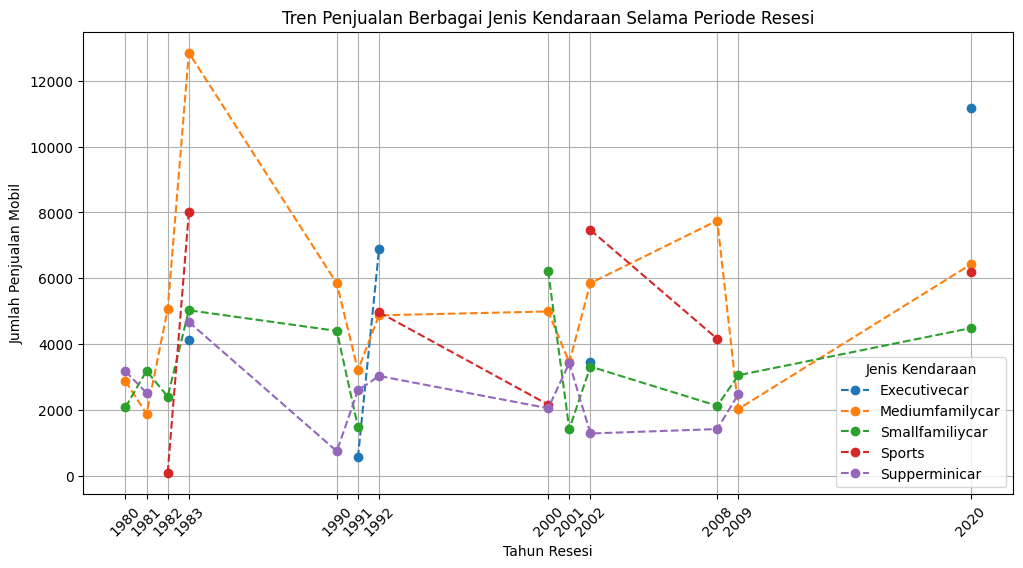

In [13]:
df_grouped = df.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().unstack()

plt.figure(figsize=(12,6))
for vehicle_type in df_grouped.columns:
    plt.plot(df_grouped.index, df_grouped[vehicle_type], marker='o', linestyle='-', label=vehicle_type)

plt.xlabel("Tahun")
plt.ylabel("Jumlah Penjualan Mobil")
plt.title("Tren Penjualan Berbagai Jenis Kendaraan dari Tahun ke Tahun")
plt.xticks(df_grouped.index, rotation=45)
plt.grid(True)
plt.legend(title="Jenis Kendaraan")
plt.show()

recession_years = df[df['Recession'] == 1]['Year'].unique()
df_recession = df[df['Year'].isin(recession_years)].groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().unstack()

plt.figure(figsize=(12,6))
for vehicle_type in df_recession.columns:
    plt.plot(df_recession.index, df_recession[vehicle_type], marker='o', linestyle='--', label=vehicle_type)

plt.xlabel("Tahun Resesi")
plt.ylabel("Jumlah Penjualan Mobil")
plt.title("Tren Penjualan Berbagai Jenis Kendaraan Selama Periode Resesi")
plt.xticks(df_recession.index, rotation=45)
plt.grid(True)
plt.legend(title="Jenis Kendaraan")
plt.show()

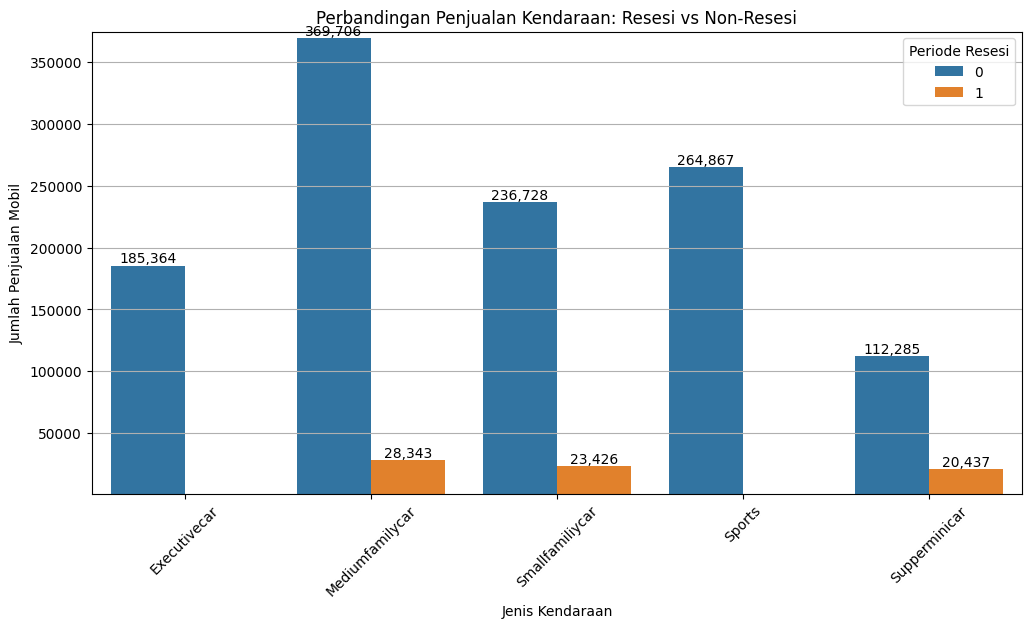

In [23]:
import seaborn as sns

df_grouped = df.groupby(['Vehicle_Type', 'Recession'])['Automobile_Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=df_grouped,
    x='Vehicle_Type',
    y='Automobile_Sales',
    hue='Recession'
)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.title("Perbandingan Penjualan Kendaraan: Resesi vs Non-Resesi")
plt.xlabel("Jenis Kendaraan")
plt.ylabel("Jumlah Penjualan Mobil")
plt.legend(title="Periode Resesi")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.ylim(1000, df_grouped['Automobile_Sales'].max() + 5000)

plt.show()

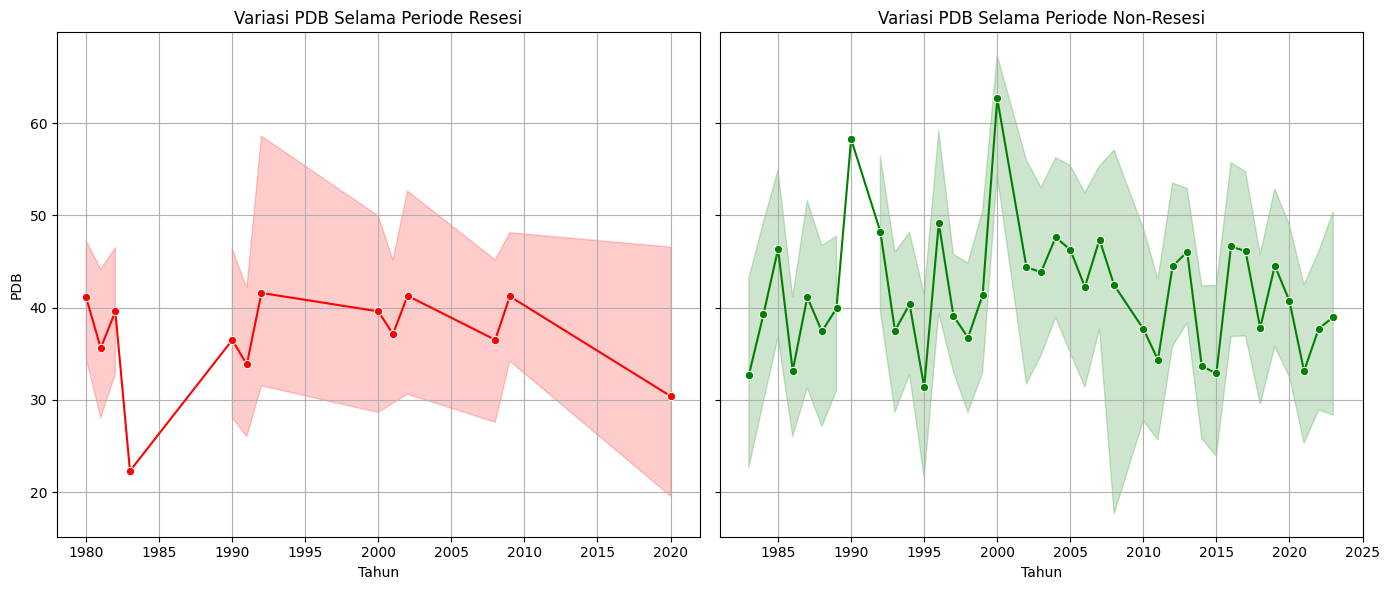

In [ ]:
import seaborn as sns
# Memisahkan data menjadi periode resesi dan non-resesi
df_recession = df[df['Recession'] == 1]
df_non_recession = df[df['Recession'] == 0]

# Membuat subplot (kiri untuk resesi, kanan untuk non-resesi)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot untuk periode resesi
sns.lineplot(ax=axes[0], data=df_recession, x='Year', y='GDP', marker='o', linestyle='-', color='red')
axes[0].set_title("Variasi PDB Selama Periode Resesi")
axes[0].set_xlabel("Tahun")
axes[0].set_ylabel("PDB")
axes[0].grid(True)

# Plot untuk periode non-resesi
sns.lineplot(ax=axes[1], data=df_non_recession, x='Year', y='GDP', marker='o', linestyle='-', color='green')
axes[1].set_title("Variasi PDB Selama Periode Non-Resesi")
axes[1].set_xlabel("Tahun")
axes[1].grid(True)

# Menampilkan plot
plt.tight_layout(
plt.show()

Dari visualisasi yang ditampilkan:

Selama Periode Resesi (Grafik Kiri - Merah):
- PDB cenderung mengalami penurunan atau fluktuasi dengan tren yang tidak stabil.
- Rentang variasi lebih besar pada beberapa tahun, yang ditunjukkan oleh area bayangan (confidence interval), menandakan adanya ketidakpastian ekonomi yang tinggi.
- Terlihat bahwa pada beberapa titik, PDB mengalami penurunan tajam, yang umum terjadi selama periode resesi.

Selama Periode Non-Resesi (Grafik Kanan - Hijau):
- PDB menunjukkan lebih banyak fluktuasi tetapi dengan tren yang relatif lebih stabil dibandingkan periode resesi.
- Meskipun ada variabilitas, tidak ada penurunan tajam yang mencolok seperti yang terjadi pada grafik resesi.
- Beberapa tahun mengalami kenaikan tajam, menandakan pertumbuhan ekonomi yang lebih sehat dibandingkan saat resesi.

Kesimpulan:
PDB selama periode resesi lebih rentan mengalami penurunan drastis dan fluktuasi yang tidak menentu, sedangkan pada periode non-resesi, PDB lebih stabil dan cenderung mengalami pertumbuhan.